# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(crime.iloc[:,1:]))
data 

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


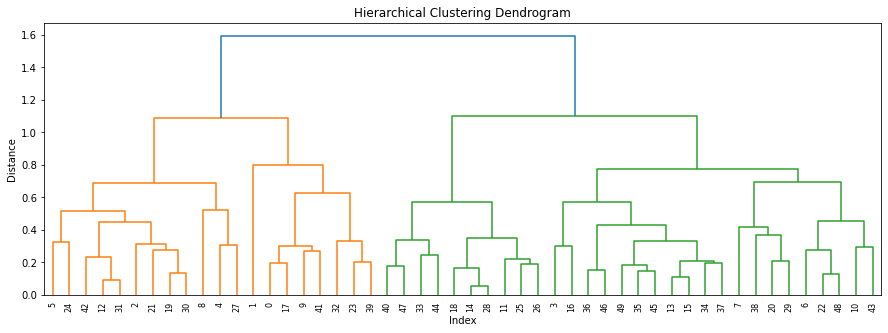

In [4]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(data, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=7, linkage='complete',affinity = "euclidean").fit(data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,6
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,1


In [6]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,10.883333,256.916667,78.333333,32.250000,0.0
1,14.671429,251.285714,54.285714,21.685714,1.0
2,3.180000,78.700000,49.300000,11.630000,2.0
3,3.420000,80.200000,74.400000,15.980000,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0
5,6.918182,138.636364,64.636364,20.263636,5.0
6,5.275000,180.000000,83.250000,14.800000,6.0


# K Means Clustering

In [7]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

In [8]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [10]:
df_norm = norm_func(crime.iloc[:,1:]) 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


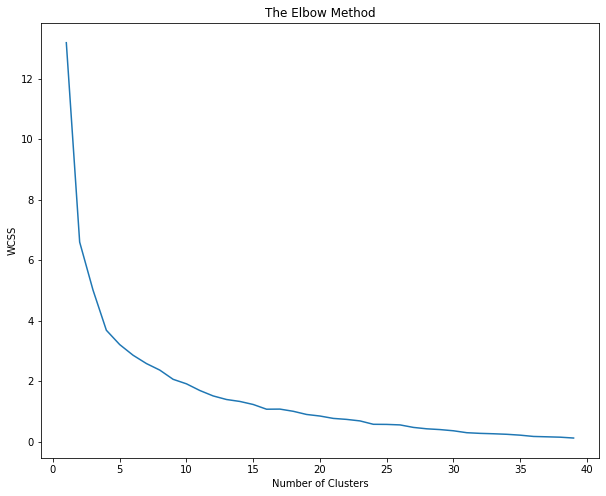

In [11]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 40):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 40), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [12]:
WCSS

[13.184122550256445,
 6.596893867946199,
 5.010878493006419,
 3.683456153585915,
 3.210029051943962,
 2.858755982298858,
 2.5837580152638067,
 2.3676856888338804,
 2.063083756517067,
 1.9137773560063862,
 1.6936149717145024,
 1.5138478851068176,
 1.3956962544898917,
 1.33173559337012,
 1.2313726090251114,
 1.0749624765460877,
 1.078980410184407,
 1.0063649342883767,
 0.9013662011285895,
 0.8499773059745364,
 0.7714186301411188,
 0.7386091098040084,
 0.688505587540461,
 0.5769124232953202,
 0.5731904894084672,
 0.556479455843879,
 0.4738978636434147,
 0.42762223675124766,
 0.4019872095520464,
 0.36255365316632965,
 0.2990367114772599,
 0.27721192151417845,
 0.2640474310977953,
 0.24634789210246644,
 0.21769473963965646,
 0.17518008022760476,
 0.1633765633719746,
 0.1508331565158792,
 0.12296137639831435]

In [13]:
clf = KMeans(n_clusters=10)
y_kmeans = clf.fit_predict(df_norm)
y_kmeans

array([4, 7, 9, 1, 2, 2, 0, 8, 9, 4, 3, 0, 6, 3, 0, 3, 1, 4, 5, 9, 8, 9,
       0, 4, 3, 1, 0, 2, 0, 8, 9, 6, 4, 5, 3, 3, 3, 3, 8, 4, 5, 4, 6, 3,
       5, 1, 3, 5, 0, 1])

In [14]:
md=pd.Series(y_kmeans)   
crime['clust']=md  
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,7
2,Arizona,8.1,294,80,31.0,9
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,8
8,Florida,15.4,335,80,31.9,9
9,Georgia,17.4,211,60,25.8,4


In [15]:
crime.iloc[:,1:6].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,2.828571,81.428571,62.571429,12.614286,0
1,7.960000,145.000000,55.600000,17.700000,1
2,9.700000,244.000000,83.333333,41.766667,2
3,5.980000,125.300000,71.900000,22.210000,3
4,14.671429,251.285714,54.285714,21.685714,4
5,2.920000,68.600000,42.200000,9.680000,5
6,11.400000,234.666667,83.000000,25.200000,6
7,10.000000,263.000000,48.000000,44.500000,7
8,5.275000,180.000000,83.250000,14.800000,8


Text(0.5, 1.0, 'Clusters using KMeans')

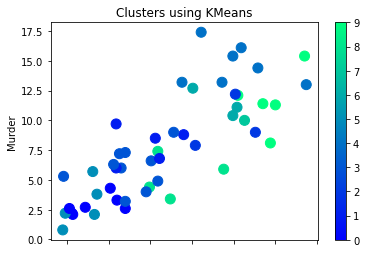

In [18]:
crime.plot(x="Assault",y ="Murder",c=clf.labels_,kind="scatter",s=100 ,cmap=plt.cm.winter) 
plt.title('Clusters using KMeans')